# Dataset Exploration

In [1]:
!pip install pyarrow fastparquet

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_csv("../..//Data\Top 1000 Steam Games 2023 export 2025-07-09 14-37-02.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\wasadmin\AppData\Local\Temp\3\ipykernel_7592\1554087440.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv("../Data\Top 1000 Steam Games 2023 export 2025-07-09 14-37-02.csv")


,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,216345,5530,0,"10,000,000 .. 20,000,000",0,0,0,0,999,999,0,"English, French, German, Italian, Spanish - Sp...",Action,10775,"{'Action': 5448, 'FPS': 4862, 'Multiplayer': 3..."
1,20,Team Fortress Classic,Valve,Valve,NaN,6472,990,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,77,"{'Action': 759, 'FPS': 320, 'Multiplayer': 272..."
2,30,Day of Defeat,Valve,Valve,NaN,5686,634,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Spain",Action,89,"{'FPS': 794, 'World War II': 261, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,2242,490,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,8,"{'Action': 633, 'FPS': 147, 'Classic': 113, 'M..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,17468,890,0,"2,000,000 .. 5,000,000",0,0,0,0,499,499,0,"English, French, German, Korean",Action,162,"{'FPS': 905, 'Action': 343, 'Classic': 271, 'S..."


In [3]:
df['score_rank'].unique()

array([nan])

In [4]:
df = df.drop(['average_forever', 'average_2weeks', 'median_forever', 'median_2weeks', 'userscore', 'score_rank', 'initialprice', 'languages'], axis=1)

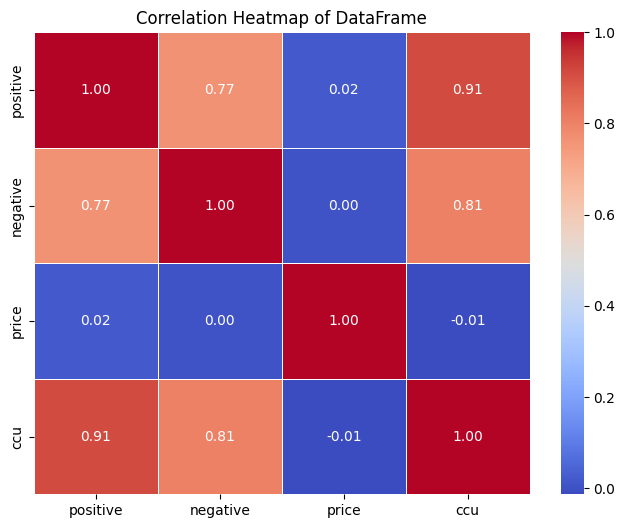

In [8]:
numerical_df = df[["positive", "negative", "price", "ccu"]]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of DataFrame')
plt.show()
del numerical_df

In [278]:
# Convert multi-genre strings to one-hot encoded features
def one_hot_encode_genres(df):
    # Assuming genres are stored as comma-separated strings
    # If they're in another format (lists, etc.), adjust the splitting logic
    all_genres = set()
    for genres in df['genre']:
        if isinstance(genres, str):
            all_genres.update([g.strip() for g in genres.split(',')])
    
    # Create binary columns for each genre
    for genre in all_genres:
        column_name = f'genre_{genre.lower().replace(" ", "_")}'
        df[column_name] = df['genre'].apply(
            lambda x: 1 if isinstance(x, str) and genre in x else 0
        )
    
    return df
df = one_hot_encode_genres(df)
df.head(10)

,appid,name,developer,publisher,positive,negative,owners,price,discount,genre,...,genre_photo_editing,genre_indie,genre_casual,genre_early_access,genre_animation_&_modeling,genre_audio_production,genre_utilities,genre_action,genre_video_production,genre_gore
0,10,Counter-Strike,Valve,Valve,216345,5530,"10,000,000 .. 20,000,000",999,0,Action,...,0,0,0,0,0,0,0,1,0,0
1,20,Team Fortress Classic,Valve,Valve,6472,990,"5,000,000 .. 10,000,000",499,0,Action,...,0,0,0,0,0,0,0,1,0,0
2,30,Day of Defeat,Valve,Valve,5686,634,"5,000,000 .. 10,000,000",499,0,Action,...,0,0,0,0,0,0,0,1,0,0
3,40,Deathmatch Classic,Valve,Valve,2242,490,"5,000,000 .. 10,000,000",499,0,Action,...,0,0,0,0,0,0,0,1,0,0
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,17468,890,"2,000,000 .. 5,000,000",499,0,Action,...,0,0,0,0,0,0,0,1,0,0
5,60,Ricochet,Valve,Valve,4302,952,"5,000,000 .. 10,000,000",499,0,Action,...,0,0,0,0,0,0,0,1,0,0
6,70,Half-Life,Valve,Valve,87726,3191,"10,000,000 .. 20,000,000",999,0,Action,...,0,0,0,0,0,0,0,1,0,0
7,80,Counter-Strike: Condition Zero,Valve,Valve,21155,2023,"5,000,000 .. 10,000,000",999,0,Action,...,0,0,0,0,0,0,0,1,0,0
8,130,Half-Life: Blue Shift,Gearbox Software,Valve,12547,1126,"5,000,000 .. 10,000,000",499,0,Action,...,0,0,0,0,0,0,0,1,0,0
9,220,Half-Life 2,Valve,Valve,164166,4137,"5,000,000 .. 10,000,000",999,0,Action,...,0,0,0,0,0,0,0,1,0,0


In [279]:
# Handle missing values
df = df.fillna({'positive': 0, 'negative': 0, 'owners': 0, 'ccu': 0})

# Create derived features
df['review_ratio'] = df['positive'] / (df['positive'] + df['negative'] + 1)  # Add 1 to avoid division by zero
df['discount_percentage'] = (df['initialprice'] - df['price']) / (df['initialprice'] + 0.01)


KeyError: 'initialprice'

In [280]:
df['tags'].iloc[27]

"{'Animation & Modeling': 707, 'Video Production': 492, 'Free to Play': 492, 'Software': 400, 'Movie': 299, 'Difficult': 209, 'Sandbox': 204, 'Funny': 163, 'Comedy': 133, 'Singleplayer': 123, 'Moddable': 114, 'Character Customization': 103, 'Memes': 83, 'Survival Horror': 61, 'Games Workshop': 46, 'Anime': 40, 'Great Soundtrack': 33, 'Sexual Content': 23, '3D': 22, 'Hentai': 14}"

In [281]:
import json
import pandas as pd
import numpy as np

# Extract tags into a structured format
def process_tags(tags_str):
    # Handle empty or null values
    if not tags_str or tags_str == '[]' or tags_str == '{}':
        return {}
    
    # Convert the string representation to a Python object
    if isinstance(tags_str, str):
        try:
            # Replace single quotes with double quotes for valid JSON
            tags_obj = json.loads(tags_str.replace("'", '"'))
        except json.JSONDecodeError:
            # Alternative approach if the above fails
            try:
                tags_obj = eval(tags_str)  # Be careful with eval - only use with trusted data
            except:
                return {}  # Return empty dict if parsing fails
    else:
        tags_obj = tags_str  # If it's already a Python object
    
    # Handle the case where tags_obj is a list
    if isinstance(tags_obj, list):
        return {}  # Return empty dictionary for list entries
    
    # Now we're sure tags_obj is a dictionary
    # Normalize tag counts by dividing by the sum
    total = sum(tags_obj.values()) if tags_obj else 1
    return {tag.lower(): count/total for tag, count in tags_obj.items()}  # Convert tags to lowercase here

# Apply the function to your dataframe
df['normalized_tags'] = df['tags'].apply(process_tags)

# Create a function to expand the normalized tags into columns (optimized version)
def expand_tags_to_columns_optimized(df):
    # First, collect all unique tags across all games
    all_tags = set()
    for tags_dict in df['normalized_tags']:
        all_tags.update(tags_dict.keys())
    
    # Create column names with 'tags_' prefix and lowercase
    tag_columns = ['tags_' + tag.lower() for tag in all_tags]
    
    # Create a dictionary to hold the tag data
    tag_data = {col: np.zeros(len(df), dtype=float) for col in tag_columns}
    
    # Fill in the values from normalized_tags (much more efficient)
    for idx, tags_dict in enumerate(df['normalized_tags']):
        for tag, value in tags_dict.items():
            tag_data['tags_' + tag.lower()][idx] = value
    
    # Create the tag dataframe all at once
    tag_df = pd.DataFrame(tag_data, index=df.index)
    
    # Concatenate the original dataframe with the tag dataframe
    result_df = pd.concat([df, tag_df], axis=1)
    
    return result_df

# Apply the optimized function to expand tags into columns
expanded_df = expand_tags_to_columns_optimized(df)

# Now you can see the game names alongside their tag values
# Display a sample of the result (first 5 rows and some columns)
# expanded_df[['name'] + list(expanded_df.columns[-5:])].head()


In [283]:
expanded_df[['name'] + list(expanded_df.columns[-10:])].head(30)


,name,tags_deckbuilding,tags_4 player local,tags_action rts,tags_post-apocalyptic,tags_building,tags_cult classic,tags_dark,tags_lovecraftian,tags_aliens,tags_hero shooter
0,Counter-Strike,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,Team Fortress Classic,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.064507
2,Day of Defeat,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,Deathmatch Classic,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,Half-Life: Opposing Force,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.053024,0.000000
5,Ricochet,0.0,0.0,0.0,0.000000,0.0,0.014344,0.000000,0.0,0.000000,0.000000
6,Half-Life,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.049438,0.000000
7,Counter-Strike: Condition Zero,0.0,0.0,0.0,0.000000,0.0,0.000000,0.005876,0.0,0.000000,0.000000
8,Half-Life: Blue Shift,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.064368,0.000000
9,Half-Life 2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.031454,0.000000


In [ ]:
# Remove discount column, since we now have discount_ratio. Could also swap positive & negative for a totalReviews feature
df = df.drop(['discount'], axis=1)
df.head()

,name,developer,publisher,positive,negative,owners,price,languages,genre,ccu,tags,review_ratio,discount_percentage,normalized_tags
0,Counter-Strike,Valve,Valve,216345,5530,"10,000,000 .. 20,000,000",999,"English, French, German, Italian, Spanish - Sp...",Action,10775,"{'Action': 5448, 'FPS': 4862, 'Multiplayer': 3...",0.975072,0.0,"{'Action': 0.16471655328798185, 'FPS': 0.14699..."
1,Team Fortress Classic,Valve,Valve,6472,990,"5,000,000 .. 10,000,000",499,"English, French, German, Italian, Spanish - Sp...",Action,77,"{'Action': 759, 'FPS': 320, 'Multiplayer': 272...",0.867212,0.0,"{'Action': 0.22356406480117821, 'FPS': 0.09425..."
2,Day of Defeat,Valve,Valve,5686,634,"5,000,000 .. 10,000,000",499,"English, French, German, Italian, Spanish - Spain",Action,89,"{'FPS': 794, 'World War II': 261, 'Multiplayer...",0.899541,0.0,"{'FPS': 0.31039874902267395, 'World War II': 0..."
3,Deathmatch Classic,Valve,Valve,2242,490,"5,000,000 .. 10,000,000",499,"English, French, German, Italian, Spanish - Sp...",Action,8,"{'Action': 633, 'FPS': 147, 'Classic': 113, 'M...",0.820344,0.0,"{'Action': 0.4420391061452514, 'FPS': 0.102653..."
4,Half-Life: Opposing Force,Gearbox Software,Valve,17468,890,"2,000,000 .. 5,000,000",499,"English, French, German, Korean",Action,162,"{'FPS': 905, 'Action': 343, 'Classic': 271, 'S...",0.951468,0.0,"{'FPS': 0.24993095829881248, 'Action': 0.09472..."


In [57]:
import json

# Helper function to convert string representation to dictionary
def parse_tags(tags_str):
    if not tags_str or tags_str == '[]' or tags_str == '{}':
        return {}
    
    if isinstance(tags_str, str):
        try:
            tags_obj = json.loads(tags_str.replace("'", '"'))
        except json.JSONDecodeError:
            try:
                tags_obj = eval(tags_str)  # Be careful with eval - only use with trusted data
            except:
                return {}
    else:
        tags_obj = tags_str
    
    # Handle the case where tags_obj is a list
    if isinstance(tags_obj, list):
        return {}
        
    return tags_obj

# Create a tag vocabulary (all unique tags across games)
all_tags = set()
for tags_str in df['tags']:
    tags_dict = parse_tags(tags_str)
    all_tags.update(tags_dict.keys())

# One-hot encoding with weighted values
for tag in all_tags:
    df[f'tag_{tag}'] = df['tags'].apply(
        lambda x: parse_tags(x).get(tag, 0) / sum(parse_tags(x).values()) 
        if parse_tags(x) and sum(parse_tags(x).values()) > 0 
        else 0
    )


C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_9564\2592861659.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tag_{tag}'] = df['tags'].apply(
C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_9564\2592861659.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tag_{tag}'] = df['tags'].apply(
C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_9564\2592861659.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

In [74]:
df.head()

,name,developer,publisher,positive,negative,owners,price,genre,ccu,tags,...,tag_Education,tag_2D Fighter,tag_Base-Building,tag_Reboot,tag_Gun Customization,tag_Nudity,tag_Immersive Sim,tag_Philosophical,tag_Open World,tag_Dark Humor
0,Counter-Strike,Valve,Valve,216345,5530,"10,000,000 .. 20,000,000",999,Action,10775,"{'Action': 5448, 'FPS': 4862, 'Multiplayer': 3...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Team Fortress Classic,Valve,Valve,6472,990,"5,000,000 .. 10,000,000",499,Action,77,"{'Action': 759, 'FPS': 320, 'Multiplayer': 272...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Day of Defeat,Valve,Valve,5686,634,"5,000,000 .. 10,000,000",499,Action,89,"{'FPS': 794, 'World War II': 261, 'Multiplayer...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Deathmatch Classic,Valve,Valve,2242,490,"5,000,000 .. 10,000,000",499,Action,8,"{'Action': 633, 'FPS': 147, 'Classic': 113, 'M...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Half-Life: Opposing Force,Gearbox Software,Valve,17468,890,"2,000,000 .. 5,000,000",499,Action,162,"{'FPS': 905, 'Action': 343, 'Classic': 271, 'S...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd

# Step 1: Create developer and publisher statistics dictionaries
developer_stats = {}
publisher_stats = {}

# Count games per developer
for developer in df['developer'].unique():
    developer_stats[developer] = {
        'game_count': len(df[df['developer'] == developer])
    }

# Count games per publisher
for publisher in df['publisher'].unique():
    publisher_stats[publisher] = {
        'game_count': len(df[df['publisher'] == publisher])
    }

# Step 2: Define the function to process company data
def process_company_data(row):
    features = {}
    
    # Derived features
    features['is_self_published'] = (row['developer'] == row['publisher'])
    
    # Developer history features
    features['developer_game_count'] = developer_stats.get(row['developer'], {}).get('game_count', 0)
    features['publisher_game_count'] = publisher_stats.get(row['publisher'], {}).get('game_count', 0)
    
    return pd.Series(features)

# Step 3: Apply the function to each row and add the new columns to the DataFrame
new_features = df.apply(process_company_data, axis=1)

# Step 4: Add the new columns to the original DataFrame
df = pd.concat([df, new_features], axis=1)

# Display the first few rows to verify the new columns
print(df[['developer', 'publisher', 'is_self_published', 'developer_game_count', 'publisher_game_count']].head())


          developer publisher  is_self_published  developer_game_count  \
0             Valve     Valve               True                    27   
1             Valve     Valve               True                    27   
2             Valve     Valve               True                    27   
3             Valve     Valve               True                    27   
4  Gearbox Software     Valve              False                     6   

   publisher_game_count  
0                    31  
1                    31  
2                    31  
3                    31  
4                    31  


In [76]:
# Remove additoinal features
# Drop the newly added columns
df = df.drop(columns=['is_self_published', 'developer_game_count', 'publisher_game_count'])

# Verify the columns were dropped
print(df.columns.tolist())


['name', 'developer', 'publisher', 'positive', 'negative', 'owners', 'price', 'genre', 'ccu', 'tags', 'review_ratio', 'discount_percentage', 'normalized_tags', 'tag_Cartoon', 'tag_Football (Soccer)', 'tag_Spectacle fighter', "tag_1990's", 'tag_Naval', 'tag_Competitive', 'tag_Unforgiving', 'tag_Adventure', 'tag_God Game', 'tag_Online Co-Op', 'tag_Steampunk', 'tag_Strategy RPG', 'tag_Mini Golf', 'tag_Animation & Modeling', 'tag_Episodic', 'tag_Game Development', 'tag_Noir', 'tag_Sniper', 'tag_Snow', 'tag_Nature', 'tag_Science', 'tag_Sexual Content', 'tag_Hex Grid', 'tag_VR Only', 'tag_MMORPG', 'tag_Escape Room', 'tag_Lore-Rich', 'tag_Third-Person Shooter', 'tag_VR', 'tag_Based On A Novel', 'tag_Boss Rush', 'tag_Inventory Management', 'tag_Assassin', 'tag_Modern', 'tag_Tower Defense', 'tag_Crowdfunded', 'tag_Nostalgia', 'tag_Economy', 'tag_Building', 'tag_Roguevania', 'tag_Hentai', 'tag_Benchmark', 'tag_Thriller', 'tag_Character Customization', 'tag_Romance', 'tag_LEGO', 'tag_Psychologica

In [81]:
print(df['genre'].iloc[22])
print(df['tags'].iloc[22])


Action, Free to Play, Strategy
{'Free to Play': 59069, 'MOBA': 19752, 'Multiplayer': 14952, 'Strategy': 13926, 'e-sports': 11438, 'Team-Based': 10705, 'Competitive': 8058, 'Action': 7772, 'Online Co-Op': 7271, 'PvP': 5832, 'Difficult': 5131, 'Co-op': 4148, 'RTS': 3973, 'Tower Defense': 3645, 'RPG': 3634, 'Fantasy': 3622, 'Character Customization': 2816, 'Replay Value': 2675, 'Action RPG': 2358, 'Simulation': 1869}


In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with the game data
def preprocess_data(df):
    # Create a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Handle the genre feature (which contains multiple genres)
    # One-hot encode genres
    all_genres = set()
    for genres in processed_df['genre'].dropna():
        if isinstance(genres, str):
            all_genres.update([g.strip() for g in genres.split(',')])
    
    for genre in all_genres:
        col_name = f'genre_{genre.replace(" ", "_").lower()}'
        processed_df[col_name] = processed_df['genre'].apply(
            lambda x: 1 if isinstance(x, str) and genre in x else 0
        )
    
    # Convert review metrics to a single score
    processed_df['review_score'] = processed_df['positive'] / (processed_df['positive'] + processed_df['negative'] + 1)
    
    # Process 'owners' feature to get the average of the range
    def calculate_average_owners(owners_str):
        if isinstance(owners_str, str):
            try:
                low, high = map(int, owners_str.replace(',', '').split('-'))
                return (low + high) / 2
            except ValueError:
                return np.nan
        return np.nan
    
    processed_df['owners'] = processed_df['owners'].apply(calculate_average_owners)
    
    # Extract numeric features for scaling
    numeric_features = ['price', 'owners', 'ccu', 'review_score', 'discount_percentage']
    
    # Handle any missing values
    for feature in numeric_features:
        if feature in processed_df.columns:
            processed_df[feature] = processed_df[feature].fillna(processed_df[feature].median())
    
    # Scale numeric features
    scaler = StandardScaler()
    processed_df[numeric_features] = scaler.fit_transform(processed_df[numeric_features])
    
    return processed_df


processed_df = preprocess_data(df)
processed_df.head()


C:\Users\wasadmin\AppData\Roaming\Python\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\wasadmin\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\wasadmin\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\wasadmin\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,name,developer,publisher,positive,negative,owners,price,genre,ccu,tags,...,genre_indie,genre_casual,genre_early_access,genre_animation_&_modeling,genre_audio_production,genre_utilities,genre_action,genre_video_production,genre_gore,review_score
0,Counter-Strike,Valve,Valve,216345,5530,NaN,-0.314121,Action,0.107210,"{'Action': 5448, 'FPS': 4862, 'Multiplayer': 3...",...,0,0,0,0,0,0,1,0,0,1.043213
1,Team Fortress Classic,Valve,Valve,6472,990,NaN,-0.635828,Action,-0.146936,"{'Action': 759, 'FPS': 320, 'Multiplayer': 272...",...,0,0,0,0,0,0,1,0,0,0.182018
2,Day of Defeat,Valve,Valve,5686,634,NaN,-0.635828,Action,-0.146651,"{'FPS': 794, 'World War II': 261, 'Multiplayer...",...,0,0,0,0,0,0,1,0,0,0.440150
3,Deathmatch Classic,Valve,Valve,2242,490,NaN,-0.635828,Action,-0.148575,"{'Action': 633, 'FPS': 147, 'Classic': 113, 'M...",...,0,0,0,0,0,0,1,0,0,-0.192191
4,Half-Life: Opposing Force,Gearbox Software,Valve,17468,890,NaN,-0.635828,Action,-0.144917,"{'FPS': 905, 'Action': 343, 'Classic': 271, 'S...",...,0,0,0,0,0,0,1,0,0,0.854752


In [88]:
def engineer_features(df):
    # Select features for similarity calculation
    
    # Categorical features to use
    categorical_features = [col for col in df.columns if col.startswith('genre_') or 
                           col.startswith('tag_') or 
                           col == 'normalized_tags']
    
    # Numeric features
    numeric_features = ['price', 'review_score', 'ccu', 'discount_percentage']
    
    # Developer and publisher features
    # Create a feature indicating if developer and publisher are the same
    df['self_published'] = (df['developer'] == df['publisher']).astype(int)
    
    # Get developer and publisher frequency counts
    developer_counts = df['developer'].value_counts().to_dict()
    publisher_counts = df['publisher'].value_counts().to_dict()
    
    # Add developer and publisher popularity as features
    df['developer_popularity'] = df['developer'].map(developer_counts)
    df['publisher_popularity'] = df['publisher'].map(publisher_counts)
    
    # Normalize these new features
    scaler = StandardScaler()
    df[['developer_popularity', 'publisher_popularity']] = scaler.fit_transform(
        df[['developer_popularity', 'publisher_popularity']])
    
    # Combine all features for similarity calculation
    similarity_features = numeric_features + categorical_features + ['self_published', 
                                                                    'developer_popularity', 
                                                                    'publisher_popularity']
    
    return df, similarity_features

processed_df, sims = engineer_features(processed_df)
print(sims)
processed_df.head()

['price', 'review_score', 'ccu', 'discount_percentage', 'normalized_tags', 'tag_Cartoon', 'tag_Football (Soccer)', 'tag_Spectacle fighter', "tag_1990's", 'tag_Naval', 'tag_Competitive', 'tag_Unforgiving', 'tag_Adventure', 'tag_God Game', 'tag_Online Co-Op', 'tag_Steampunk', 'tag_Strategy RPG', 'tag_Mini Golf', 'tag_Animation & Modeling', 'tag_Episodic', 'tag_Game Development', 'tag_Noir', 'tag_Sniper', 'tag_Snow', 'tag_Nature', 'tag_Science', 'tag_Sexual Content', 'tag_Hex Grid', 'tag_VR Only', 'tag_MMORPG', 'tag_Escape Room', 'tag_Lore-Rich', 'tag_Third-Person Shooter', 'tag_VR', 'tag_Based On A Novel', 'tag_Boss Rush', 'tag_Inventory Management', 'tag_Assassin', 'tag_Modern', 'tag_Tower Defense', 'tag_Crowdfunded', 'tag_Nostalgia', 'tag_Economy', 'tag_Building', 'tag_Roguevania', 'tag_Hentai', 'tag_Benchmark', 'tag_Thriller', 'tag_Character Customization', 'tag_Romance', 'tag_LEGO', 'tag_Psychological Horror', 'tag_Cute', 'tag_Political', 'tag_Action RPG', 'tag_Werewolves', 'tag_Dyna

,name,developer,publisher,positive,negative,owners,price,genre,ccu,tags,...,genre_animation_&_modeling,genre_audio_production,genre_utilities,genre_action,genre_video_production,genre_gore,review_score,self_published,developer_popularity,publisher_popularity
0,Counter-Strike,Valve,Valve,216345,5530,NaN,-0.314121,Action,0.107210,"{'Action': 5448, 'FPS': 4862, 'Multiplayer': 3...",...,0,0,0,1,0,0,1.043213,1,5.074095,2.014022
1,Team Fortress Classic,Valve,Valve,6472,990,NaN,-0.635828,Action,-0.146936,"{'Action': 759, 'FPS': 320, 'Multiplayer': 272...",...,0,0,0,1,0,0,0.182018,1,5.074095,2.014022
2,Day of Defeat,Valve,Valve,5686,634,NaN,-0.635828,Action,-0.146651,"{'FPS': 794, 'World War II': 261, 'Multiplayer...",...,0,0,0,1,0,0,0.440150,1,5.074095,2.014022
3,Deathmatch Classic,Valve,Valve,2242,490,NaN,-0.635828,Action,-0.148575,"{'Action': 633, 'FPS': 147, 'Classic': 113, 'M...",...,0,0,0,1,0,0,-0.192191,1,5.074095,2.014022
4,Half-Life: Opposing Force,Gearbox Software,Valve,17468,890,NaN,-0.635828,Action,-0.144917,"{'FPS': 905, 'Action': 343, 'Classic': 271, 'S...",...,0,0,0,1,0,0,0.854752,0,0.641288,2.014022


## BERT

In [ ]:
!pip install transformers torch

In [71]:
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

print("BERT model and tokenizer loaded successfully.")


C:\Users\wasadmin\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
C:\Users\wasadmin\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\wasadmin\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/h

ImportError: 
BertModel requires the PyTorch library but it was not found in your environment. Check out the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.


In [ ]:
import torch

# Example: Assuming df is your DataFrame and 'languages' is the column with lists of languages
def get_language_features(languages_list):
    # Concatenate languages into a single string
    languages_str = ' '.join(languages_list)
    
    # Tokenize the string
    inputs = tokenizer(languages_str, return_tensors='pt', padding=True, truncation=True, max_length=512)
    
    # Get BERT features
    with torch.no_grad():
        outputs = model(**inputs)
        # Use the last hidden state as features
        features = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    
    return features

# Apply the function to each row in your DataFrame
df['language_features'] = df['languages'].apply(get_language_features)
